In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

- Dowloanding MNIST Dataset :

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)


# Exercise 1 :

* These commands give properties of the dataset :

In [3]:
print(mnist.data)
print(mnist.target)
print(len(mnist.data))
help(len)
print(mnist.data.shape)
print(mnist.target.shape)
mnist.data[0]
mnist.data[0][1]
mnist.data[:,1]
mnist.data[:100]


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['5' '0' '4' ... '4' '5' '6']
70000
Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.

(70000, 784)
(70000,)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

* Data visualisation :

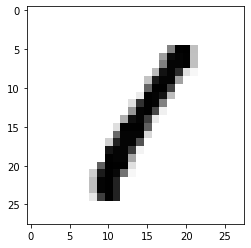

In [4]:
images = mnist.data.reshape((-1, 28, 28))
plt.imshow(images[3],cmap=plt.cm.gray_r,interpolation="nearest") # showing an example of the available images
plt.show()

# KNN Algorithm

- The k-nearest neighbors algorithm (k-nn: for k-neighborrest neighbors in English) is a very intuitive, configurable and often powerful algorithm to deal with a problem of classification.
- The k-nn requires:
    * An integer k
    * A learning base
    * A metric for proximity

In [5]:
from time import time
import numpy as np
from sklearn import neighbors
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix

In [6]:
indices = np.random.randint(70000, size=5000)
data = mnist.data[indices]
target = mnist.target[indices]

- Tests for the TP (with a train = 80 %)

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

* Training a K-NN classifier with k = 10 using mnist dataset

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8, test_size=0.2)

clf = neighbors.KNeighborsClassifier(10)

clf.fit(xtrain,ytrain)
prediction = clf.predict(xtest)
score = clf.score(xtest, ytest)
# The image "4"
print("Prediction : {}, Value : {}, Efficacity : {}".format(prediction[4], ytest[4], score))

Prediction : 8, Value : 8, Efficacity : 0.915


> We have a score of ~92%
>> The error rate is very low but at the same time we have a big data set

 Showing the forth image

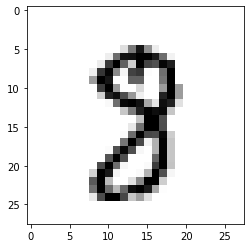

In [9]:
images = xtest.reshape((-1, 28, 28))
plt.imshow(images[4],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()

* Variation loop of k :

In [11]:
for k in range (2,16):
    clf = neighbors.KNeighborsClassifier(k)

    clf.fit(xtrain, ytrain)
    prediction = clf.predict(xtest)
    score = clf.score(xtest, ytest)
    print("K = {}, Efficacity is : {}".format(k, score))


K = 2, Efficacity is : 0.924
K = 3, Efficacity is : 0.94
K = 4, Efficacity is : 0.929
K = 5, Efficacity is : 0.93
K = 6, Efficacity is : 0.924
K = 7, Efficacity is : 0.921
K = 8, Efficacity is : 0.915
K = 9, Efficacity is : 0.918
K = 10, Efficacity is : 0.915
K = 11, Efficacity is : 0.913
K = 12, Efficacity is : 0.912
K = 13, Efficacity is : 0.914
K = 14, Efficacity is : 0.911
K = 15, Efficacity is : 0.913


> We observe an efficiency peak between 3 and 9

* Variation loop of K with KFOLD :

In [12]:

mykf = KFold(14,shuffle = True)
mykf.get_n_splits(data)

k = 2

for train_index, test_index in mykf.split(data):

    
    xtrain, xtest = data[train_index], data[test_index]
    ytrain, ytest = target[train_index], target[test_index]

    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(xtrain,ytrain)
    prediction = clf.predict(xtest)
    score = clf.score(xtest, ytest)
    print("K = {}, Efficacity is : {}".format(k, score))

    k = k + 1

K = 2, Efficacity is : 0.9301675977653632
K = 3, Efficacity is : 0.9329608938547486
K = 4, Efficacity is : 0.9047619047619048
K = 5, Efficacity is : 0.9187675070028011
K = 6, Efficacity is : 0.9327731092436975
K = 7, Efficacity is : 0.9243697478991597
K = 8, Efficacity is : 0.9523809523809523
K = 9, Efficacity is : 0.927170868347339
K = 10, Efficacity is : 0.9131652661064426
K = 11, Efficacity is : 0.9439775910364145
K = 12, Efficacity is : 0.938375350140056
K = 13, Efficacity is : 0.907563025210084
K = 14, Efficacity is : 0.907563025210084
K = 15, Efficacity is : 0.9439775910364145


> Since the train set changes all the time, it's hard to compare rates efficiency between them for this loop ...> The results oscillate.

* Other way :

In [18]:
from sklearn import metrics
import time
from sklearn.model_selection import KFold

ResultScore =[]
ResultPrecision = []
ResultRecall = []
ResultLoss = []
ResultTimeTraining = []
ResultTimePrediction = []


k_fold = KFold( n_splits=14, shuffle=True)
print(k_fold)
k=1
for train_indices,test_indices in k_fold.split(data,target):
    k+=1
    clf=neighbors.KNeighborsClassifier(k)
    # Algo
    startTrain =time.time()
    clf.fit(data[train_indices],target[train_indices])
    endTrain = time.time()
    startpred= time.time()
    clf.predict(data[test_indices])
    endpred = time.time()
    # Metrics
    predict = clf.predict(data[test_indices])
    score = clf.score(data[test_indices],target[test_indices])
    precision =  metrics.precision_score(target[test_indices], predict,  average='macro')
    recall = metrics.recall_score(target[test_indices], predict, average ='macro')
    loss01 = metrics.zero_one_loss(target[test_indices], predict)
    timetrain = endTrain - startTrain
    timePred = endpred - startpred
    # Append
    ResultScore.append(score)
    ResultPrecision.append(precision)
    ResultRecall.append(recall)
    ResultLoss.append(loss01) 
    ResultTimeTraining.append(timetrain)
    ResultTimePrediction.append(timePred)
    print("K = ", k, "Score = ", clf.score(data[test_indices],target[test_indices])*100, "%")

KFold(n_splits=14, random_state=None, shuffle=True)
K =  2 Score =  89.94413407821229 %
K =  3 Score =  92.73743016759776 %
K =  4 Score =  92.71708683473389 %
K =  5 Score =  93.8375350140056 %
K =  6 Score =  94.11764705882352 %
K =  7 Score =  92.43697478991596 %
K =  8 Score =  91.03641456582633 %
K =  9 Score =  91.87675070028011 %
K =  10 Score =  90.19607843137256 %
K =  11 Score =  93.27731092436974 %
K =  12 Score =  92.15686274509804 %
K =  13 Score =  94.39775910364145 %
K =  14 Score =  92.43697478991596 %
K =  15 Score =  91.03641456582633 %


> N.B :
The recall is the ratio `tp / (tp + fn)` where `tp` is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0.

> showing this results

In [19]:
print(ResultScore)
print("\n")
print(ResultPrecision)
print("\n")
print("\n")
print(ResultLoss)
print("\n")
print(ResultTimeTraining)
print("\n")
print(ResultTimePrediction)

[0.8994413407821229, 0.9273743016759777, 0.927170868347339, 0.938375350140056, 0.9411764705882353, 0.9243697478991597, 0.9103641456582633, 0.9187675070028011, 0.9019607843137255, 0.9327731092436975, 0.9215686274509803, 0.9439775910364145, 0.9243697478991597, 0.9103641456582633]


[0.9003285088739054, 0.9292126074633813, 0.9276708891794705, 0.9376707666299428, 0.9414208277103014, 0.9243070972482738, 0.9125192612602886, 0.9263704947257579, 0.9097715996156138, 0.9336697622166469, 0.9199113081795229, 0.9496450242493271, 0.92343441520327, 0.9116890603621277]




[0.1005586592178771, 0.07262569832402233, 0.07282913165266103, 0.06162464985994398, 0.05882352941176472, 0.07563025210084029, 0.08963585434173671, 0.08123249299719892, 0.0980392156862745, 0.0672268907563025, 0.07843137254901966, 0.05602240896358546, 0.07563025210084029, 0.08963585434173671]


[0.03644824028015137, 0.03399944305419922, 0.09299874305725098, 0.08803629875183105, 0.02752852439880371, 0.014374732971191406, 0.036018610000

> Visualization of results :

Text(0, 0.5, '¨Prediction Time (s)')

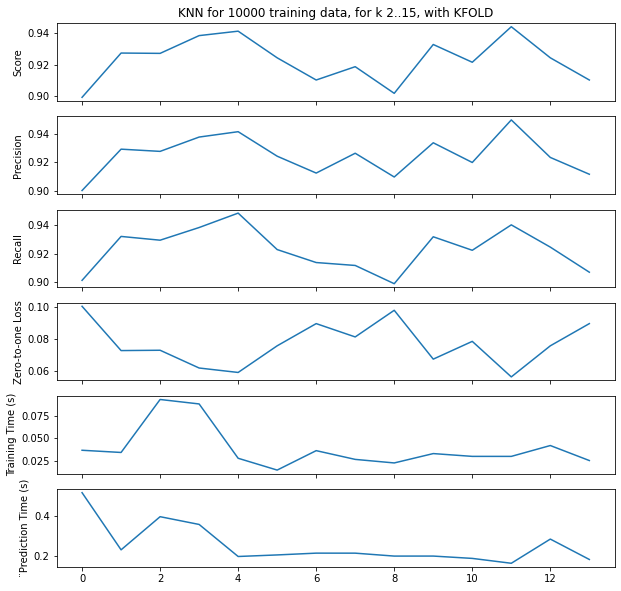

In [21]:
fig, axarr = plt.subplots(6, sharex=True, figsize=(10,10))

axarr[0].plot(range(14), ResultScore)
axarr[0].set_title('KNN for 10000 training data, for k 2..15, with KFOLD')
axarr[0].set_ylabel('Score')
axarr[1].plot(range(14), ResultPrecision)
axarr[1].set_ylabel('Precision')
axarr[2].plot(range(14), ResultRecall)
axarr[2].set_ylabel('Recall')
axarr[3].plot(range(14), ResultLoss)
axarr[3].set_ylabel('Zero-to-one Loss')
axarr[4].plot(range(14), ResultTimeTraining)
axarr[4].set_ylabel('Training Time (s)')
axarr[5].plot(range(14), ResultTimePrediction)
axarr[5].set_ylabel('¨Prediction Time (s)')

* Variation of training percent :

Training size = 0.2 %, Score = 0.8685 
Training size = 0.3 %, Score = 0.898 
Training size = 0.4 %, Score = 0.9136666666666666 
Training size = 0.5 %, Score = 0.918 
Training size = 0.6 %, Score = 0.924 
Training size = 0.7 %, Score = 0.9213333333333333 
Training size = 0.8 %, Score = 0.921 
Training size = 0.9 %, Score = 0.934 


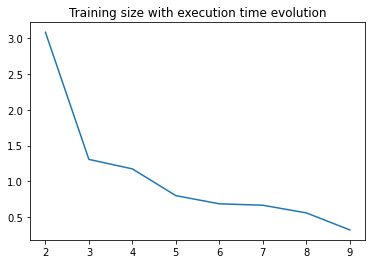

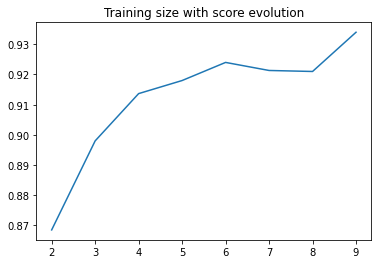

In [23]:
score=[]
execution_time=[]

values_of_test = range (2,10)

for t in values_of_test:

    xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=(t/10))

    clasifier = neighbors.KNeighborsClassifier(3)

    begin = time.time()
    clasifier.fit(xtrain,ytrain)
    predicted = clasifier.predict(X=xtest)
    end = time.time()
    total_time = end - begin

    score.append(clasifier.score(xtest, ytest))
    execution_time.append(total_time)
    print("Training size = {} %, Score = {} ".format((t/10), clasifier.score(xtest, ytest)))
    #print("time: ", total_time)

plt.plot(values_of_test,execution_time)
plt.title("Training size with execution time evolution")
plt.show()
plt.plot(values_of_test,score)
plt.title("Training size with score evolution")
plt.show()

> As long as we increase training as long as we get better scores..

* Testing with n_jobs = 1 then -1 :

In [25]:
for i in [-1,1]:
    
    clf = neighbors.KNeighborsClassifier(7,n_jobs=i)

    clf.fit(xtrain, ytrain)
    time_start = time.time()
    prediction = clf.predict(xtest)
    time_stop = time.time()
    score = clf.score(xtest, ytest)
    print("n_jobs = {}, Total Time = {}".format(i,time_stop-time_start))

n_jobs = -1, Total Time = 1.233351707458496
n_jobs = 1, Total Time = 0.4162125587463379


> Indeed, when we take all the available processes, things go faster!